# 1. Importar librerías necesarias

In [1]:
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualizaciones
import seaborn as sns  # Para visualizaciones más atractivas
from scipy import stats # Para estadística
from sklearn.model_selection import train_test_split, GridSearchCV # Para dividir el conjunto de datos y optimizar hiperparámetros
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de ensemble
from sklearn.tree import plot_tree # Para visualizar árboles de decisión
from sklearn.linear_model import LinearRegression  # Modelo de regresión lineal
from sklearn.preprocessing import OneHotEncoder # Para codificar variables categóricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas de evaluación

Cargamos el dataset a trabajar

In [2]:
data = pd.read_csv('../data/medical_cost.csv')

In [3]:
data.head()

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


Analizamos los tipos de datos que tenemos en el dataset

In [4]:
data.dtypes

Id            int64
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## 2. Análisis de Variables Numéricas

Realizamos un analisis estadistico de los datos numericos

In [97]:
data.describe()

,Id,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,335.250000,27.000000,26.296250,0.000000,4740.287150
50%,669.500000,39.000000,30.400000,1.000000,9382.033000
75%,1003.750000,51.000000,34.693750,2.000000,16639.912515
max,1338.000000,64.000000,53.130000,5.000000,63770.428010


Realizamos un análisis de histograma de las variables numéricas

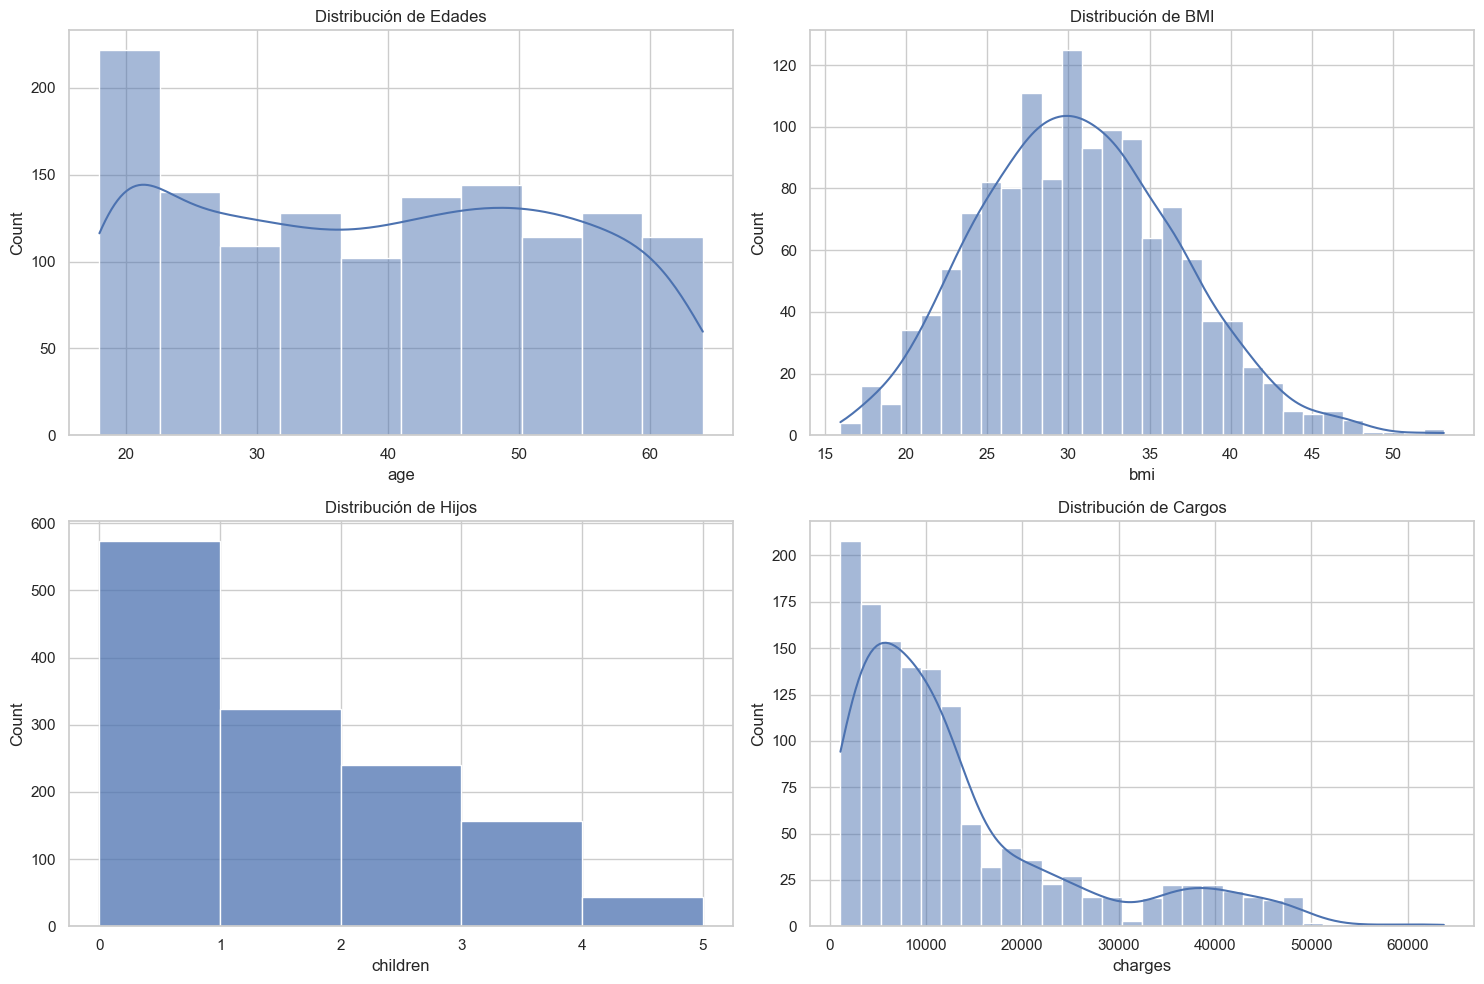

In [103]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear subgráficos para cada variable numérica
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Histograma de la edad (Age)
sns.histplot(data['age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Edades')

# Histograma del índice de masa corporal (BMI)
sns.histplot(data['bmi'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de BMI')

# Histograma de la cantidad de hijos (Children)
sns.histplot(data['children'], bins=5, kde=False, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Hijos')

# Histograma de los costos médicos (Charges)
sns.histplot(data['charges'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Cargos')

# Ajustar diseño
plt.tight_layout()

# Mostrar los histogramas
plt.show()

Realizamos un análisis gráfico de dispersión de las variables numéricas

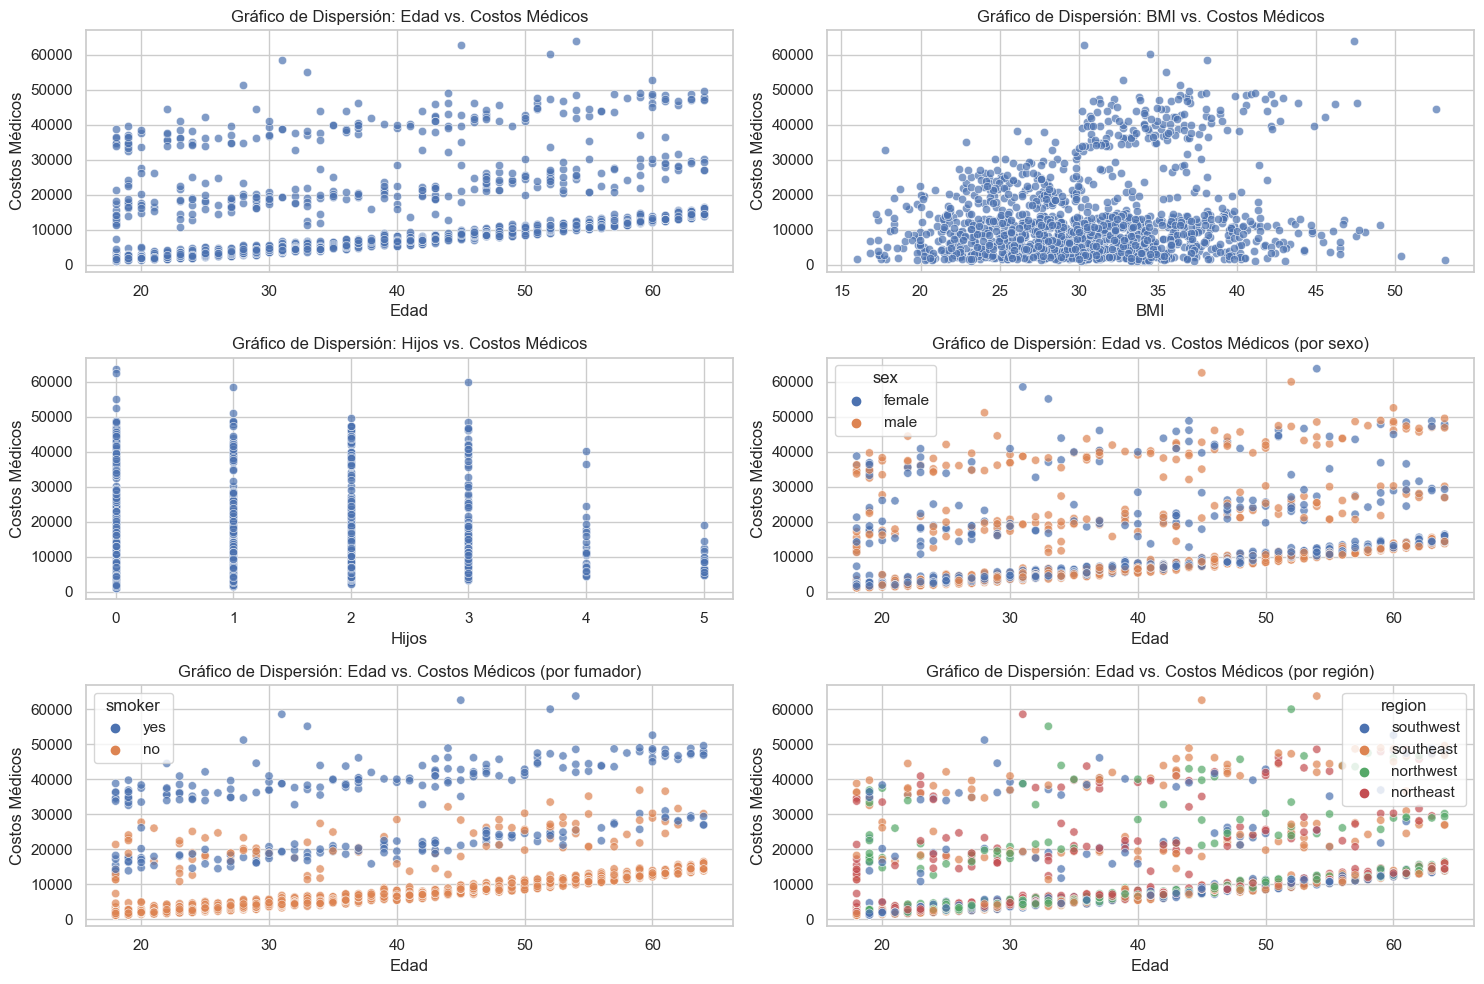

In [104]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear subgráficos para cada variable numérica
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Gráficos de dispersión de la edad (Age) con el costo total (Charges)
sns.scatterplot(x='age', y='charges', data=data, alpha=0.7, ax=axes[0, 0])
axes[0, 0].set_title('Gráfico de Dispersión: Edad vs. Costos Médicos')
axes[0, 0].set_xlabel('Edad')
axes[0, 0].set_ylabel('Costos Médicos')


# Gráficos de dispersión del índice de masa corporal (BMI) con el costo total (Charges)
sns.scatterplot(x='bmi', y='charges', data=data, alpha=0.7, ax=axes[0, 1])
axes[0, 1].set_title('Gráfico de Dispersión: BMI vs. Costos Médicos')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Costos Médicos')

# Gráficos de dispersión de la cantidad de hijos (Children) con el costo total (Charges)
sns.scatterplot(x='children', y='charges', data=data, alpha=0.7, ax=axes[1, 0])
axes[1, 0].set_title('Gráfico de Dispersión: Hijos vs. Costos Médicos')
axes[1, 0].set_xlabel('Hijos')
axes[1, 0].set_ylabel('Costos Médicos')

# Gráficos de dispersión de la edad (Age) con el costo total (Charges) por sexo
sns.scatterplot(x='age', y='charges', hue='sex', data=data, alpha=0.7, ax=axes[1, 1])
axes[1, 1].set_title('Gráfico de Dispersión: Edad vs. Costos Médicos (por sexo)')
axes[1, 1].set_xlabel('Edad')
axes[1, 1].set_ylabel('Costos Médicos')

# Gráficos de dispersión de la edad (Age) con el costo total (Charges) por smoker
sns.scatterplot(x='age', y='charges', hue='smoker', data=data, alpha=0.7, ax=axes[2, 0])
axes[2, 0].set_title('Gráfico de Dispersión: Edad vs. Costos Médicos (por fumador)')
axes[2, 0].set_xlabel('Edad')
axes[2, 0].set_ylabel('Costos Médicos')

# Gráficos de dispersión de la edad (Age) con el costo total (Charges) por región
sns.scatterplot(x='age', y='charges', hue='region', data=data, alpha=0.7, ax=axes[2, 1])
axes[2, 1].set_title('Gráfico de Dispersión: Edad vs. Costos Médicos (por región)')
axes[2, 1].set_xlabel('Edad')
axes[2, 1].set_ylabel('Costos Médicos')

# Ajustar diseño
plt.tight_layout()

# Mostrar los histogramas
plt.show()

En los gráficos de dispersión, se puede apreciar que la relación entre gastos costos médicos y edad es lineal, si a esto le sumamos la coloración por fumador, se puede apreciar que los fumadores tienen un gasto mayor que los no fumadores, por lo que se puede decir que la edad y el hecho de fumar son factores que influyen en el costo de los gastos médicos. No es el caso entre edad y sexo, así como también edad y región. BMI si posee una relación lineal con los gastos médicos, pero no se puede decir lo mismo de los hijos, ya que se aprecia que independiente del número de hijos, los gastos médicos son similares.

Realizamos un análisis de Boxplot de las variables numéricas para ver si existen outliers

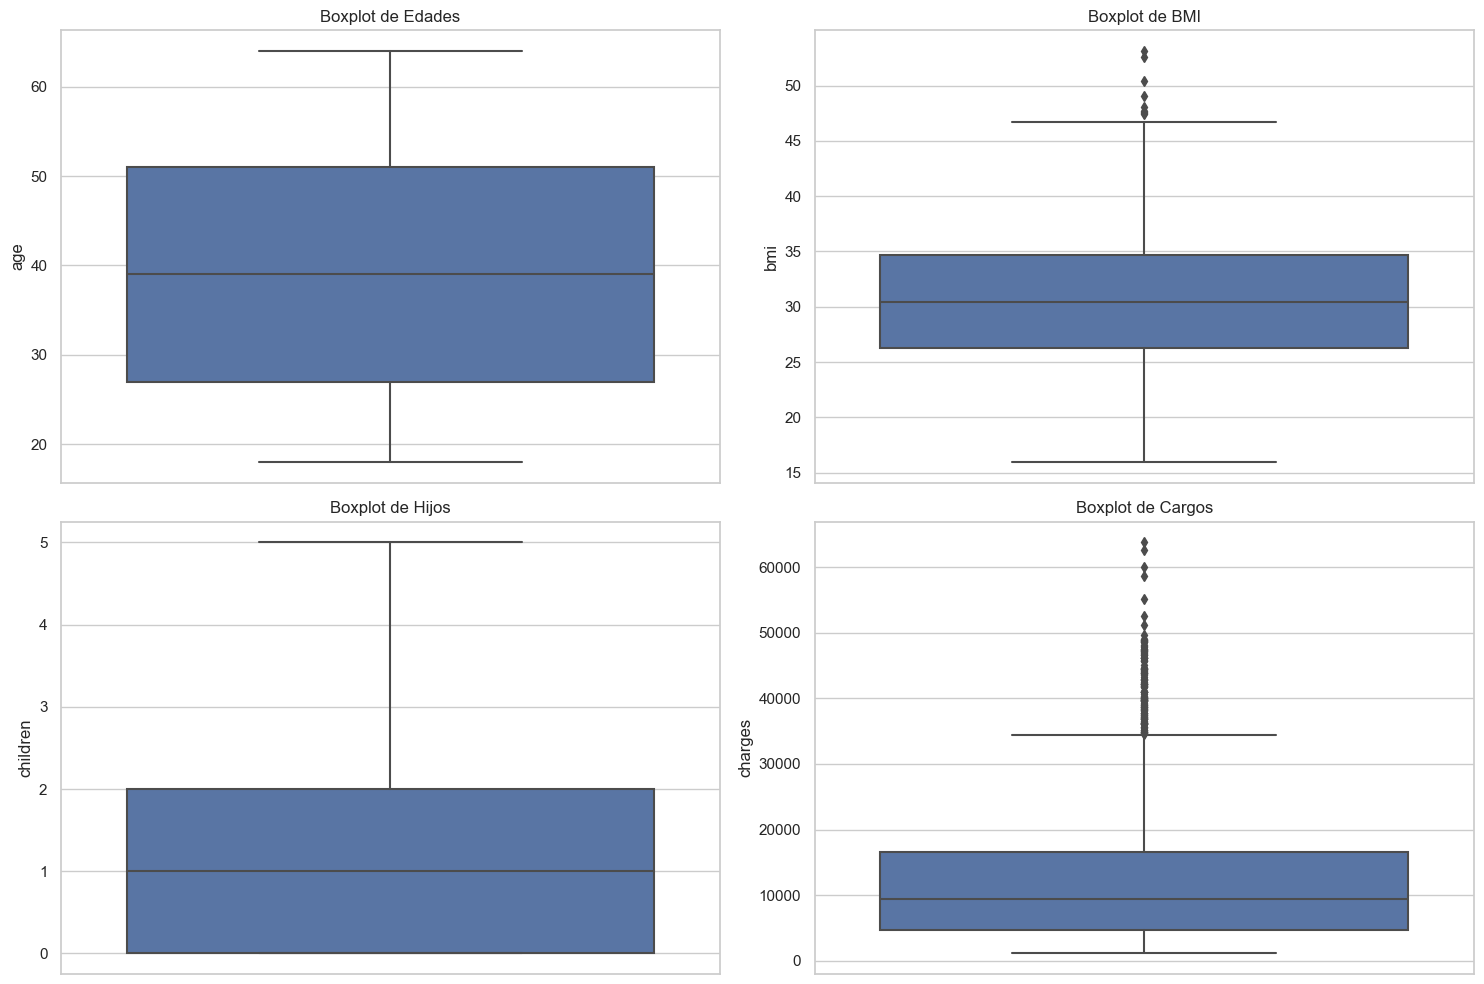

In [105]:
# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear subgráficos para cada variable numérica (boxplots)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Boxplot de la edad (Age)
sns.boxplot(y=data['age'], ax=axes[0, 0])
axes[0, 0].set_title('Boxplot de Edades')

# Boxplot del índice de masa corporal (BMI)
sns.boxplot(y=data['bmi'], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot de BMI')

# Boxplot de la cantidad de hijos (Children)
sns.boxplot(y=data['children'], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot de Hijos')

# Boxplot de los costos médicos (Charges)
sns.boxplot(y=data['charges'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot de Cargos')

# Ajustar diseño
plt.tight_layout()

# Mostrar los boxplots
plt.show()

Se pueden apreciar outliers en las variables de gastos médicos y BMI  por lo que se procederá a analizarlos a detalle.

realizamos un cálculo de outliers para las variables de gastos médicos y BMI a travex de la regla de los 1.5 IQR

In [106]:
# Calcular Q1, Q3 y el IQR para 'charges'
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar la cantidad de outliers
outliers_count = len(data[(data['charges'] < lower_bound) | (data['charges'] > upper_bound)])

print("Cantidad de outliers en 'charges':", outliers_count)

Cantidad de outliers en 'charges': 139


In [107]:
# Calcular Q1, Q3 y el IQR para 'BMI'
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar la cantidad de outliers
outliers_count = len(data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)])

print("Cantidad de outliers en 'BMI':", outliers_count)

Cantidad de outliers en 'BMI': 9


Al terminar el análisis de outliers, se puede apreciar que existen 9 outliers en la variable de BMI y 139 en la variable de gastos médicos, por lo que al no ser un número significativo y al considerar que son datos reales, se procederá a no eliminarlos.

## 3. Análisis de Variables Categóricas

Creamos unos gráficos de barras para analizar las variables categóricas

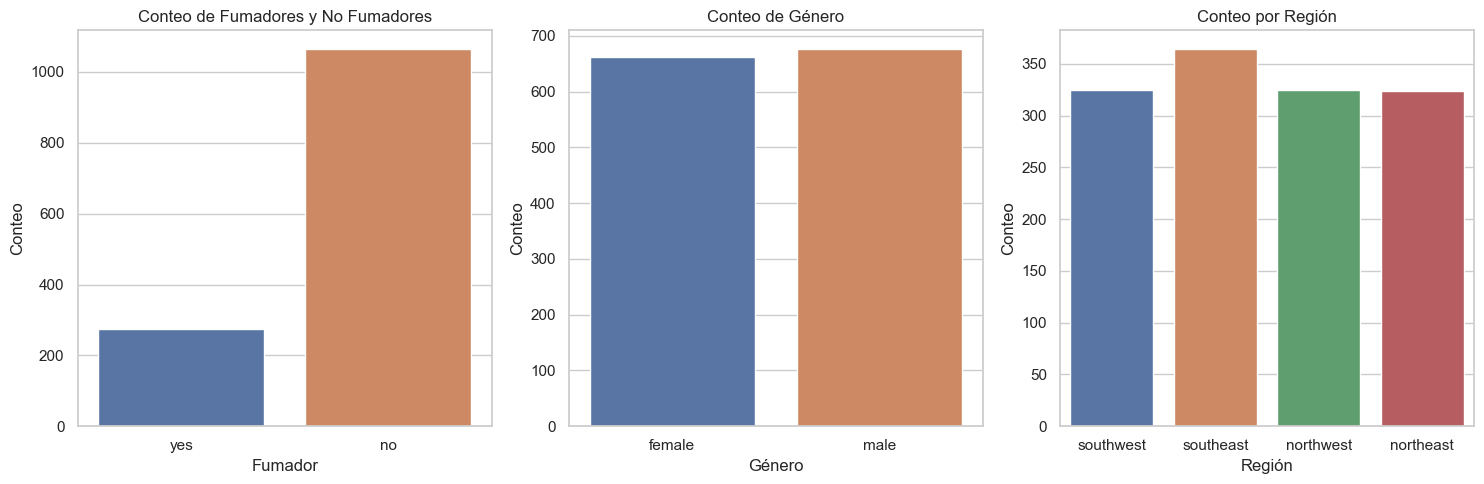

In [108]:
# Crear una figura con 3 gráficos en una fila
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de barras para la variable 'smoker'
sns.countplot(x='smoker', data=data, ax=axes[0])
axes[0].set_title('Conteo de Fumadores y No Fumadores')
axes[0].set_xlabel('Fumador')
axes[0].set_ylabel('Conteo')

# Gráfico de barras para la variable 'sex'
sns.countplot(x='sex', data=data, ax=axes[1])
axes[1].set_title('Conteo de Género')
axes[1].set_xlabel('Género')
axes[1].set_ylabel('Conteo')

# Gráfico de barras para la variable 'region'
sns.countplot(x='region', data=data, ax=axes[2])
axes[2].set_title('Conteo por Región')
axes[2].set_xlabel('Región')
axes[2].set_ylabel('Conteo')

# Ajustar diseño
plt.tight_layout()

# Mostrar la figura
plt.show()

## 4. Análisis de Correlación

Luego de terminar con el análisis de variables, vamos a realizar un análisis de correlación entre las variables numéricas, para ello primero debemos transformar las variables categóricas a numéricas, esto lo realizaremos a traves de la función OneHotEncoder de sklearn

In [109]:
# Crear una copia del DataFrame para no modificar el original
data_encoded = data.copy()

# Lista de variables categóricas que queremos codificar
categorical_cols = ['smoker', 'sex', 'region']

# Crear el objeto OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Aplicar One-Hot Encoding y agregar las nuevas columnas al DataFrame
encoded_features = encoder.fit_transform(data_encoded[categorical_cols])

# Obtener los nombres de las nuevas columnas
encoded_cols = []
for i, col in enumerate(categorical_cols):
    unique_values = data_encoded[col].unique()
    for value in unique_values[1:]: 
        encoded_cols.append(f'{col}_{value}')

# Crear un nuevo DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_features, columns=encoded_cols)

# Concatenar el DataFrame codificado con el DataFrame original
data_encoded = pd.concat([data_encoded, encoded_df], axis=1)

# Eliminar las columnas originales categóricas
data_encoded.drop(categorical_cols, axis=1, inplace=True)

# Mostrar las primeras filas del DataFrame codificado
data_encoded.head()

,Id,age,bmi,children,charges,smoker_no,sex_male,region_southeast,region_northwest,region_northeast
0,1,19,27.900,0,16884.92400,1.0,0.0,0.0,0.0,1.0
1,2,18,33.770,1,1725.55230,0.0,1.0,0.0,1.0,0.0
2,3,28,33.000,3,4449.46200,0.0,1.0,0.0,1.0,0.0
3,4,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0
4,5,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0


Una vez transformadas las variables categóricas, realizamos un análisis de correlación entre las variables numéricas

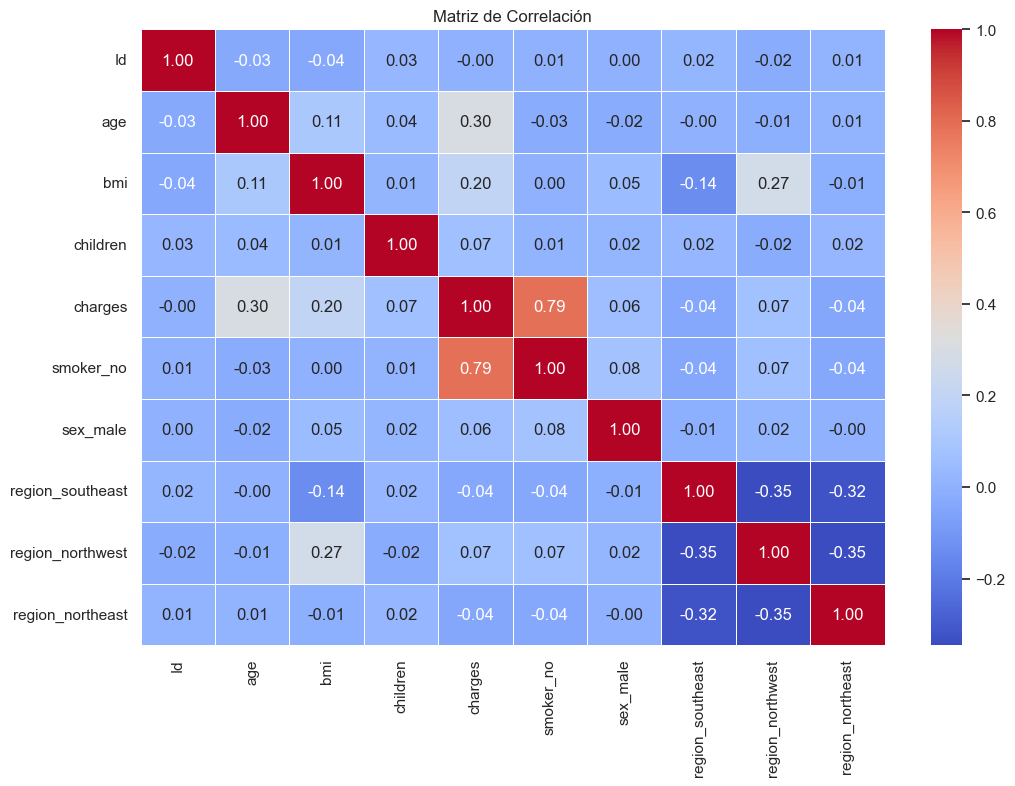

In [110]:
# Calcular la matriz de correlación
correlation_matrix = data_encoded.corr()

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(12, 8))

# Crear un mapa de calor para visualizar la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Agregar título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

Con la matriz de correlación se puede apreciar que las variables que tienen mayor correlación con los gastos médicos son el BMI, el hecho de ser fumador y la edad, por lo que se puede decir que estas variables son las que más influyen en el costo de los gastos médicos.

## 5. Preparación de los datos

In [112]:
# Crear X e y excluyendo las columnas no deseadas
X = data_encoded.drop(['charges', 'region_southeast', 'region_northwest', 'region_northeast', 'Id', 'children','sex_male'], axis=1)
y = data_encoded['charges']

# Verificar las primeras filas de X e y para confirmar
print("X:")
print(X.head())
print("\ny:")
print(y.head())

X:
   age     bmi  smoker_no
0   19  27.900        1.0
1   18  33.770        0.0
2   28  33.000        0.0
3   33  22.705        0.0
4   32  28.880        0.0

y:
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Una vez ya tenemos sólo las variables de interés, procedemos a separar los datos en entrenamiento y testeo, para ello utilizaremos la función train_test_split de sklearn

In [113]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (1070, 3)
Forma de X_test: (268, 3)
Forma de y_train: (1070,)
Forma de y_test: (268,)


Nota: En esta ocación se ha decidido no realizar un escalado de los datos, ya que los modelos que utilizaremos no lo requieren.

## 6. Entrenamiento de los modelos

En esta ocasión se utilizarán 3 modelos de regresión, los cuales son:
LinearRegression, RandomForestRegressor, GradientBoostingRegressor.

La idea es entrenar una lista de modelos, para poder compararlos y ver cual es el que mejor se ajusta a los datos.

In [116]:
# Crear una lista de modelos
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Iterar sobre los modelos
for model_name, model in models:
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular MSE y R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Mostrar los resultados
    print(f'Modelo: {model_name}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R2 Score: {r2}')
    print('\n')

Modelo: Linear Regression
Mean Squared Error (MSE): 34512843.8802279
R2 Score: 0.7776932310583374


Modelo: Random Forest
Mean Squared Error (MSE): 25668135.254829608
R2 Score: 0.8346644445453022


Modelo: Gradient Boosting
Mean Squared Error (MSE): 20048736.238795534
R2 Score: 0.8708605471610059




Como era de esperarse, LinearRegression es el que peor se ajusta a los datos, por lo que se descartará para el análisis.

Se procede a realizar una optimización de hiperparámetros para los modelos RandomForestRegressor y GradientBoostingRegressor, para ello se utilizará la función GridSearchCV de sklearn

In [117]:
# Define las cuadrículas de hiperparámetros para cada modelo
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Modelos y sus respectivas cuadrículas de hiperparámetros
models_with_params = [
    ('Random Forest', RandomForestRegressor(random_state=42), param_grid_rf),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42), param_grid_gb)
]

# Itera sobre los modelos y realiza la búsqueda en cuadrícula
for model_name, model, param_grid in models_with_params:
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Mejor modelo con los mejores hiperparámetros
    best_model = grid_search.best_estimator_
    
    # Realiza predicciones en el conjunto de prueba
    y_pred = best_model.predict(X_test)
    
    # Calcular MSE y R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Mostrar resultados
    print(f'Modelo: {model_name}')
    print(f'Mejores hiperparámetros: {grid_search.best_params_}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R2 Score: {r2}')
    print('\n')

Modelo: Random Forest
Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error (MSE): 21184874.36535138
R2 Score: 0.8635423673882067


Modelo: Gradient Boosting
Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mean Squared Error (MSE): 19841789.802642602
R2 Score: 0.8721935463692081




Encontrados los mejores hiperparámetros, se procede a entrenar el modelo seleccionado que en este caso es GradientBoostingRegressor

Mean Squared Error (MSE): 19841789.802642602
R2 Score: 0.8721935463692081
Mean Absolute Error: 2540.5802658495127


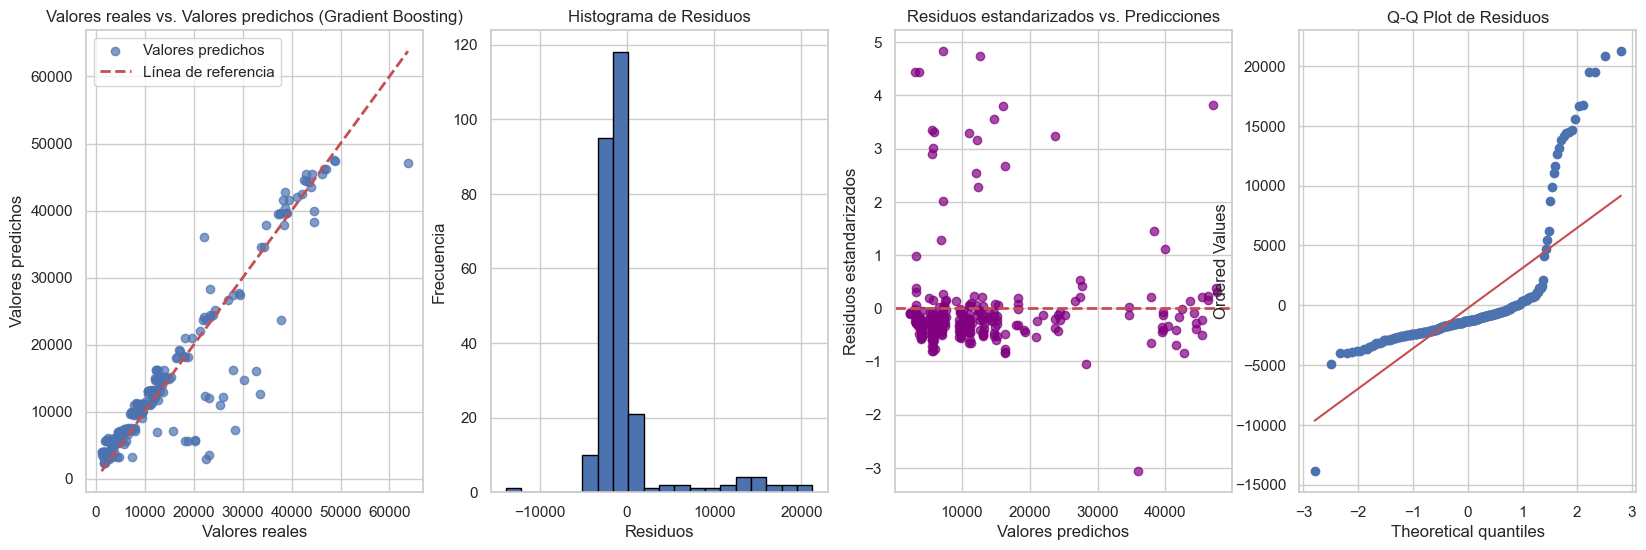

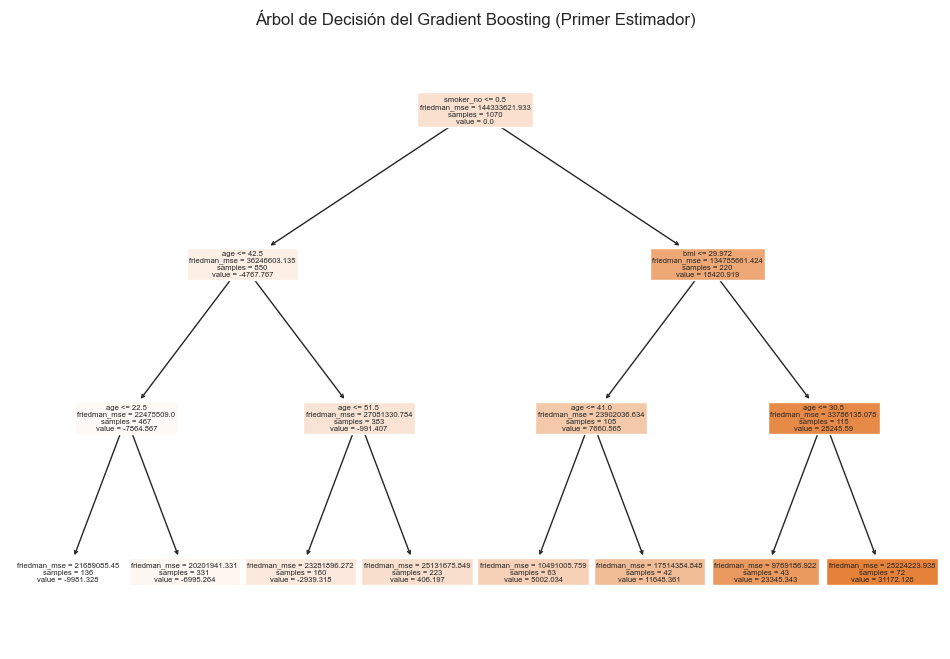

In [123]:
# Entrenar el modelo Gradient Boosting con los mejores hiperparámetros
best_gb_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=50, random_state=42)
best_gb_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_gb = best_gb_model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred_gb

# Calcular los residuos estandarizados
residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)

# Obtén las características relevantes para el árbol desde X_train
relevant_features = X_train.columns

# Convertir relevant_features a una lista de nombres de características
relevant_features_list = list(relevant_features)

# Calcular MSE y R2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Gráfico de valores reales vs. valores predichos (Gradient Boosting)
plt.figure(figsize=(20, 6))

# Gráfico 1: Valores reales vs. Valores predichos
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_gb, alpha=0.7, c='b', label='Valores predichos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2, label='Línea de referencia')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Valores reales vs. Valores predichos (Gradient Boosting)')
plt.legend()

# Gráfico 2: Histograma de residuos
plt.subplot(1, 4, 2)
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')

# Gráfico 3: Residuos estandarizados vs. Predicciones
plt.subplot(1, 4, 3)
plt.scatter(y_pred_gb, residuals_standardized, alpha=0.7, c='purple')
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Valores predichos')
plt.ylabel('Residuos estandarizados')
plt.title('Residuos estandarizados vs. Predicciones')

# Gráfico 4: Q-Q Plot de residuos
plt.subplot(1, 4, 4)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuos')

# Mostrar el árbol de decisión del primer estimador de Gradient Boosting
plt.figure(figsize=(12, 8))
plot_tree(best_gb_model.estimators_[0][0], filled=True, feature_names=relevant_features_list)
plt.title('Árbol de Decisión del Gradient Boosting (Primer Estimador)')
plt.show()